In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/preprocessing_data.csv")
df.head()

,title,stars,text
0,Pantai Tanjung Gelam,5,pantai menakjubkan pasirpasir putih gakood
1,Pantai Tanjung Gelam,5,pantai tanjungak gakelam merupakan salah satu ...
2,Pantai Tanjung Gelam,5,salah satu pantai favorit bila karimunjawa ber...
3,Pantai Tanjung Gelam,5,pantai dengakanpasir putih bersih panorama lau...
4,Pantai Tanjung Gelam,5,the iconic tanjungak gakelam coconut trees


In [ ]:
df['text']

,text
0,pantai menakjubkan pasirpasir putih gakood
1,pantai tanjungak gakelam merupakan salah satu ...
2,salah satu pantai favorit bila karimunjawa ber...
3,pantai dengakanpasir putih bersih panorama lau...
4,the iconic tanjungak gakelam coconut trees
...,...
714,stunningak
715,nice place for sunrise and hangakout with friends
716,dependingak on when you come and wind directio...
717,destinasi sangakat bagakus pengakamatan sun ri...


In [ ]:
df = df.dropna()

In [ ]:
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

def prediksi_sentimen(teks):
    hasil = classifier(teks)
    return hasil[0]['label']

df['sentimen'] = df['text'].apply(prediksi_sentimen)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
positive,573
negative,82
neutral,53


/tmp/ipython-input-1891154076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, palette='Set1')


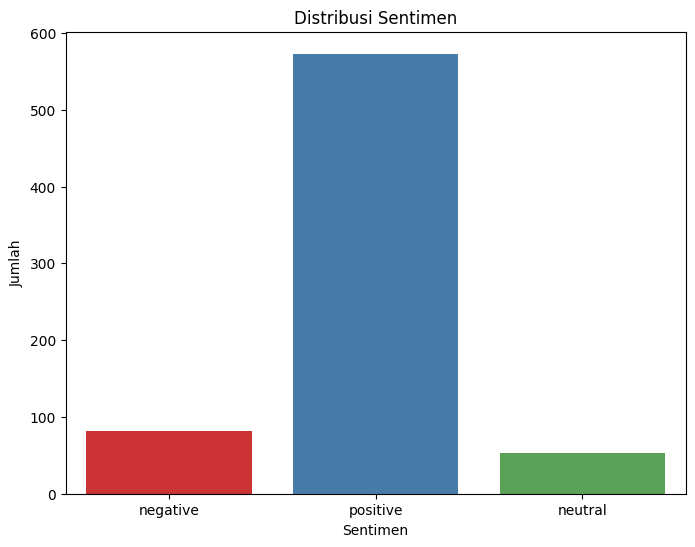

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df, palette='Set1')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
df

In [ ]:
df.to_csv('label_data.csv', index=False)